In [101]:
import numpy as np

In [102]:
ml_residuals = np.loadtxt("../experiments/2d/ml/residuals_with_pressure_solver.dat")

In [103]:
mgpcg_residuals = np.loadtxt("../experiments/2d/mgpcg/residuals_with_pressure_solver.dat")

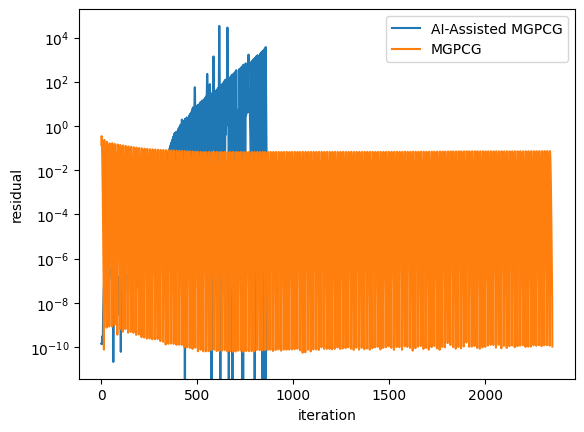

In [104]:
# plot the residuals
import matplotlib.pyplot as plt
plt.plot(ml_residuals, label="AI-Assisted MGPCG")
plt.plot(mgpcg_residuals, label="MGPCG")
plt.yscale('log')
plt.xlabel("iteration")
plt.ylabel("residual")
plt.legend()
plt.show()

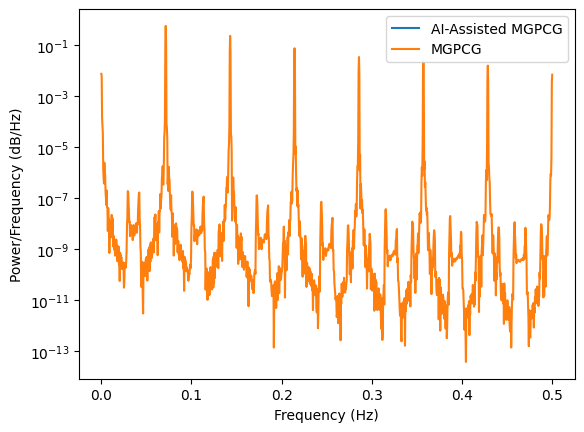

In [105]:
import matplotlib.pyplot as plt
from scipy.signal import welch

# Compute PSD using Welch method
ml_freq, ml_psd = welch(ml_residuals, fs=1.0, nperseg=len(ml_residuals))
mgpcg_freq, mgpcg_psd = welch(mgpcg_residuals, fs=1.0, nperseg=len(mgpcg_residuals))

# Plot the PSD
plt.semilogy(ml_freq, ml_psd, label="AI-Assisted MGPCG")
plt.semilogy(mgpcg_freq, mgpcg_psd, label="MGPCG")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.legend()
plt.show()
